Empezamos importando librerias

In [31]:
# LIBRARIES

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Definimos Test suites para probar nuestras implementaciones

In [32]:
# TEST SUITE

A0 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
A1 = np.array([[ 4,3],[-5,9]])
A2 = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
A3 = np.array([[20, 10], [17, 22]])
A4 = np.array([[8, 3, -2], [-4, 7, 5], [3, 4, -12]])
A5 = np.array([[4, 3, -5], [-2, -4, 5], [8, 8, 0]])
A6 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A7 = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])

b0 = np.array([1, 2, 3])
b1 = np.array([4, 5])
b2 = np.array([7, 8, 10])
b3 = np.array([4, 3])
b4 = np.array([-2, 2, 3])
b5 = np.array([3, -5, 2])

x0 = x = np.linalg.solve(A0, b0)
x1 = x = np.linalg.solve(A1, b1)
x2 = x = np.linalg.solve(A2, b2)
x3 = x = np.linalg.solve(A3, b3)
x4 = x = np.linalg.solve(A4, b4)
x5 = x = np.linalg.solve(A5, b5)

test_suite = [A0,A1,A2,A3,A4,A5,A6,A7]
test_suite_2 = [
    (A0, b0, x0), 
    (A1, b1, x1), 
    (A2, b2, x2), 
    (A3, b3, x3), 
    (A4, b4, x4), 
    (A5, b5, x5)
]
test_suite_not_singular = [A0, A1, A2, A3, A4, A5]

In [33]:
# EJERCICIO 1

def descompLU_recursive(A):
    """Solve (recursively) the LU decomposition of the matrix A, if possible without pivoting
    :param A: numpy.matrix, real square matrix ∈ Rnxn
    :returns (L,U): (numpy.matrix, numpy.matrix), L lower triangular matrix and U upper triangular matrix or (None, None) if the A matrix cannot be descomposed without pivoting"""

    #get dimensions of A
    n = A.shape[0]

    u_11 = A[0,0]
    if u_11 == 0: # whe cannot pivot anymore, the A matrix cannot be descomposed without pivoting
        return (None, None)

    if n == 1:
        return np.array([[1]]), np.array([[u_11]])


    u_12 = A[0, 1:]

    l_21 = A[1:, 0] / u_11

    recursive_A_matrix_to_solve = A[1:, 1:] - l_21.reshape(n - 1,1) * u_12

    l_22, u_22 = descompLU_recursive(recursive_A_matrix_to_solve)
    if l_22 is None or u_22 is None: # the recursive function returns a invalid matrix meaning that the A matrix cannot be descomposed without pivoting
        return None, None


    l_top_row = np.array([1] + [0] * (n - 1))
    #create a new matrix using the l_22 matrix with dimensions of (n - 1, n - 1) and the l_21 matrix with dimensions of (n - 1, 1)
    L = np.hstack((np.expand_dims(l_21, axis=1), l_22))
    #create a new matrix using the L matrix with dimensions of (n - 1, n) and the l_top_row matrix with dimensions of (1, n)
    L = np.vstack((l_top_row, L))

    u_left_row = np.array([u_11] + [0] * (n - 1))
    #create a new matrix using the u_22 matrix with dimensions of (n - 1, n - 1) and the u_12 matrix with dimensions of (1, n - 1)
    U = np.vstack((u_12, u_22))
    #create a new matrix using the U matrix with dimensions of (n, n - 1) and the u_left_row matrix with dimensions of (n, 1)
    U = np.hstack((np.expand_dims(u_left_row, axis=1), U))

    return L, U

def descompLU(A):
    """Performs LU factorization of the matrix A.
    :param A: numpy.matrix, real square matrix ∈ Rnxn
    :returns (L,U): (numpy.matrix, numpy.matrix), L lower triangular matrix and U upper triangular matrix. or the canonical matrix and A if the A matrix cannot be descomposed without pivoting"""
    L, U = descompLU_recursive(A)
    if L is None or U is None: # returns canonical and original A
        print("The A matrix cannot be descomposed without pivoting")
        return np.eye(A.shape[0]), A

    return L, U


In [34]:
#TEST EJERCICIO 1

def test_descompLU(test_suite):
    for test_case in test_suite:
        L , U = descompLU(test_case)
        if (np.allclose(test_case, L@U)):
            print("OK")
        else:
            print("ERROR")
            print(L)
            print(U)

test_descompLU(test_suite)

OK
OK
OK
OK
OK
OK
The A matrix cannot be descomposed without pivoting
OK
The A matrix cannot be descomposed without pivoting
OK


In [35]:
#EJERCICIO 2

def descompPLU(A):
    """Performs the PA=LU decomposition of the matrix A
    :param A: numpy.matrix, real square matrix ∈ Rnxn
    :returns (P, L, U): (numpy.matrix, numpy.matrix, numpy.matrix), matrix P corresponding to pivoting and the matrices L, U corresponding to factorization"""
    n = A.shape[0]
    
    # Find the indices of the diagonal elements that are zero
    diagonal_elements = A.diagonal()
    zero_diagonal_indices = np.where(diagonal_elements == 0)[0]
    # Creates P, which is initially the identity matrix
    P = np.identity(n)
    
    #Find a row that does not have zeros in position i and swap them
    if len(zero_diagonal_indices) != 0:
        for i in zero_diagonal_indices:
            for j in range(i + 1, n):
                if A[j, i] != 0:
                    P[[i, j]] = P[[j, i]]
                    break
    elif np.linalg.det(A) == 0:
        for i in range(0, n):
                P[[i, n-1]] = P[[n-1, i]]
                if np.linalg.det(P@A) != 0:
                    break
    pivot_A = np.dot(P, A)
    L, U = descompLU(pivot_A)
    return P, L, U

### ¿Cómo debería modificarlo para incorporar las permutaciones de filas?
Como se puede observar, en la línea 12 de la función **descompLU()**, se encuentra una condición donde se verifica si el parámetro **'u_11'** es nulo o no; en caso de que sea nulo, se devuelve una tupla vacía. Para incorporar las permutaciones de filas, se podría modificar esta condición de manera que verifique si el parámetro **'u_11'** es vacío o si **det(A) == 0**. En caso de que esta condición sea verdadera, se ejecutaría el bloque de código que se utilizó en **'descompPLU()'** para llevar a cabo el pivoteo de filas.


In [36]:
#TEST EJERCICIO 2

def test_descompPLU(test_suite):
    for test_case in test_suite:
        P, L, U = descompPLU(test_case)
        if (np.allclose(P@test_case, L@U)):
            print("OK")
        else:
            print("ERROR")
            print(P)
            print(L)
            print(U)

test_descompPLU(test_suite)

OK
OK
OK
OK
OK
OK
OK
The A matrix cannot be descomposed without pivoting
OK


In [37]:
print(test_suite[6])
P, L, U = descompPLU(test_suite[6])
print(P)
print(L)
print(U)
P, L, U = sp.linalg.lu(test_suite[6])
print()
print()
print(P)
print(L)
print(U)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
[[7.00000000e+00 8.00000000e+00 9.00000000e+00]
 [0.00000000e+00 8.57142857e-01 1.71428571e+00]
 [0.00000000e+00 0.00000000e+00 1.11022302e-16]]


[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
[[7.         8.         9.        ]
 [0.         0.85714286 1.71428571]
 [0.         0.         0.        ]]


In [38]:
#EJERCICIO 3

def resolverLU(A, b):
    """Returns the solution x of the system Ax = b.
    :param A: numpy.matrix, real square matrix ∈ Rnxn
    :param b: numpy.array, real array ∈ Rnx1
    :return: vector set of solutions"""
    L, U = descompLU(A)
    y = sp.linalg.solve_triangular(L, b, lower=True)
    x = sp.linalg.solve_triangular(U, y, lower=False)
    return x

In [39]:
#TEST EJERCICIO 3

def test_resolverLU(test_suite):
    for test_case in test_suite:
        x = resolverLU(test_case[0], test_case[1])
        if (np.allclose(x, test_case[2])):
            print("OK")
        else:
            print("ERROR")
            print(P)
            print(L)
            print(U)

test_resolverLU(test_suite_2)

OK
OK
OK
OK
OK
OK


In [40]:
#EJERCICIO 4

np.random.seed(13121989)

matrix = np.random.uniform(-1,1,(10,10))
vector = np.random.uniform(-1,1,(10,1))

def relative_error(A, b, x):
  """Calculate the error relative in norm-2.
  :param A: numpy.matriz, matrix ∈ Rnxn.
  :param b: numpy.array, vector ∈ Rnx1.
  :param x: numpy.array, A@x=b.
  :return error: float, ∥Ax−b∥2 / ∥b∥2"""

  return np.linalg.norm(np.dot(A,x) - b) / np.linalg.norm(b)

def test_resolver_LU(matrix, vector):
    """Test that the result obtained with resolverLU is similar to that obtained with np.linalg.solve."""
    calculated_sol = resolverLU(matrix, vector)
    real_sol = np.linalg.solve(matrix, vector)

    assert np.allclose(calculated_sol, real_sol) is True

    print("El error relativo es: ", relative_error(matrix, vector, calculated_sol))

test_resolver_LU(matrix, vector)

El error relativo es:  1.2647353438512483e-15


In [41]:
#EJERCICIO 5

def inversa(A):
    """Calculate the inverse of a matrix
    :param A: numpy.matrix, real square matrix ∈ Rnxn
    :return: A^(-1)"""
    
    dimension = A.shape[0]
    canonical_matrix = np.eye(dimension)
    ret = np.zeros((dimension, dimension))
    
    L, U = descompLU(A)

    # each column of A^(-1) is calculated by solvin the ES Ax = Canonical_i where Canonical_i is the i row if the canonical matrix
    for i in range(dimension):
        y = sp.linalg.solve_triangular(L, canonical_matrix[i], lower=True)
        inverse_canonical_row = sp.linalg.solve_triangular(U, y, lower=False)
        ret[:, i] = inverse_canonical_row

    return ret

In [42]:
#TEST EJERCICIO 5

def test_inversa(test_suite):
    for test_case in test_suite:
        x = inversa(test_case)
        if (np.allclose(x, np.linalg.inv(test_case))):
            print("OK")
        else:
            print("ERROR")
            print(P)
            print(L)
            print(U)

test_inversa(test_suite_not_singular)

OK
OK
OK
OK
OK
OK


In [43]:
#EJERCICIO 6

np.random.seed(13121989)

matrix = np.random.uniform(-1,1,(10,10))

def error_frobenius(A, A_inversa):
    """Calculate the error in Frobenius norm
    :param A: numpy.matrix, matrix ∈ Rnxn
    :param A_inversa: numpy.matrix, matrix ∈ Rnxn
    :return norma:  ∥A^(−1) * A − I∥F """

    n = A.shape[0]
    I = np.identity(n)
    matrix_A = np.dot(A_inversa, A) - I
    
    matrix_t = np.transpose(matrix_A)
    
    trace = np.trace(np.dot(matrix_t, matrix_A))
    
    return np.sqrt(trace)


def test_inversa(A):
    """Test that the result obtained with inversa() is similar to that obtained with np.linalg.inv()."""
    
    inversa_A = inversa(A)
    inversa_calculada = np.linalg.inv(A)
   
    assert np.allclose(inversa_A, inversa_calculada) is True

    print("El error Frobenius es: ",  error_frobenius(A, inversa_A))


test_inversa(matrix)

El error Frobenius es:  1.0095642421755684e-14


In [44]:
#EJERCICIO 7

v1 = np.array([])
v2 = np.array([])

# iterate over dimension 10 to 200
for i in range(10,201):
    v1_dimensional_benchmark_results = 0
    v2_dimensional_benchmark_results = 0

    #foreach dimension calculate 10 random matrices and check the relative log errors of the solutions
    for k in range(10):
        A = np.random.uniform(low=-1, high=1.0, size=(i,i))
        b = np.random.uniform(low=-1, high=1.0, size=(i,))

        #append results to the collections of errors
        x1 = resolverLU(A, b)
        v1_dimensional_benchmark_results += np.log(relative_error(A, b, x1))

        x2 = inversa(A)@b
        v2_dimensional_benchmark_results += np.log(relative_error(A, b, x2))

    v1 = np.append(v1, v1_dimensional_benchmark_results)
    v2 = np.append(v2, v2_dimensional_benchmark_results)

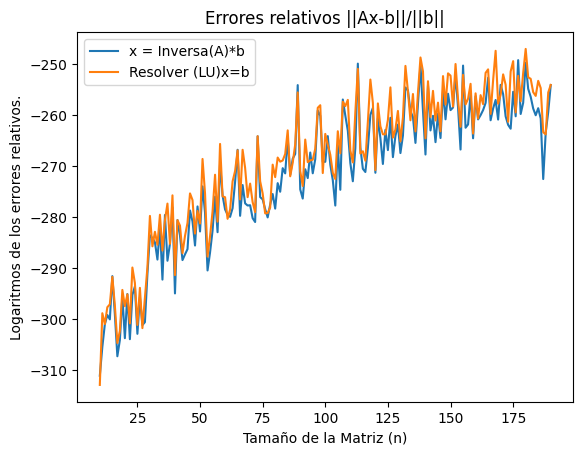

In [45]:
# Crear el gráfico
n = np.arange(10, len (v1))
plt.plot(n,v1[10:], label='x = Inversa(A)*b')
plt.plot(n,v2[10:], label='Resolver (LU)x=b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Logaritmos de los errores relativos.')
plt.legend()
plt.show()

### ¿Qué conclusión pueden obtener del gráfico?
Del gráfico se puede concluir que el método que utiliza la **descomposición LU** (Resolver (LU)x=b) tiene errores relativos más pequeños en comparación con el método que utiliza la **inversa de la matriz A** (x = Inversa(A)*b).

Esto se nota en matrices de dimensiónes mas pequeñas, pero se hace más notorio en dimensiones mayores, ya que a medida que el tamaño de la matriz aumenta, el método que utiliza la descomposición LU mantiene errores relativos bajos, lo que indica que es más preciso.

Por otro lado, el método de la inversa de la matriz A comienza a tener errores relativos más grandes a medida que n aumenta, lo que puede relacionarse con la imprecisión de los cálculos a la hora de buscar A^(-1). En otras palabras, el gráfico indica que el método de la descomposición LU es más preciso para resolver sistemas de ecuaciones lineales en comparación con la inversión directa de la matriz A, especialmente para matrices grandes.

In [46]:
#EJERCICIO 8

# iterate over dimension 10 to 200
v1 = np.array([])
v2 = np.array([])

# iterate over dimension 10 to 200
for i in range(10,201):
    v1_dimensional_benchmark_results = 0
    v2_dimensional_benchmark_results = 0

    # for each dimension calculate 10 random solutions and check the relative log errors of the solutions
    for k in range(10):
        A = np.random.uniform(low=-1, high=1.0, size=(i,i))
        b = np.random.uniform(low=-1, high=1.0, size=(i,))
        
        #append results to the collections of errors
        x1_i = resolverLU(A, b)
        x1 =  np.linalg.solve(A, b)
        v1_dimensional_benchmark_results += np.log(np.linalg.norm(x1_i - x1) / np.linalg.norm(x1))
        
        x2_i = inversa(A)@b
        x2 =  np.linalg.inv(A)@b
        v2_dimensional_benchmark_results += np.log(np.linalg.norm(x2_i - x2) / np.linalg.norm(x2))

    v1 = np.append(v1, v1_dimensional_benchmark_results)
    v2 = np.append(v2, v2_dimensional_benchmark_results)

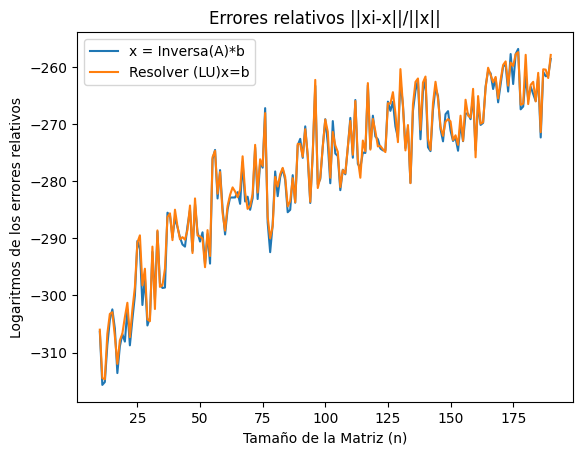

In [47]:
# Crear el gráfico

n = np.arange(10, len (v1))
plt.plot(n,v1[10:], label='x = Inversa(A)*b')
plt.plot(n,v2[10:], label='Resolver (LU)x=b')
plt.title('Errores relativos ||xi-x||/||x||')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Logaritmos de los errores relativos')
plt.legend()
plt.show()

###  ¿Observan el mismo comportamiento?
Observando el gráfico, se puede afirmar que se presenta un comportamiento similar al observado en el gráfico del ítem 7. Esto nos muestra un patrón de crecimiento en los errores relativos, pero el método de inversión directa de la matriz A comienza a generar errores más grandes de manera más rápida a medida que aumenta la dimensión, lo que indica una menor estabilidad numérica en matrices de mayor tamaño.


En conclusión, podemos ver cómo la elección del método de resolución de sistemas de ecuaciones lineales puede afectar la precisión de las soluciones, especialmente en matrices de mayor tamaño. La descomposición LU parece ser más confiable en términos de errores relativos en comparación con la inversión directa de la matriz A.

In [54]:
#EJERCICIO 9

v1 = np.array([])
v2 = np.array([])

# iterate over dimension 10 to 200
for i in range(10,201):
    v1_dimensional_benchmark_results = 0
    v2_dimensional_benchmark_results = 0

    #foreach dimension calculate 10 random matrices and check the relative log errors of the solutions
    for k in range(10):
        A = np.random.uniform(low=-1, high=1.0, size=(i,i))
        b = np.random.uniform(low=-1, high=1.0, size=(i,))

        #append results to the collections of errors
        x1 = np.linalg.solve(A, b)
        v1_dimensional_benchmark_results += np.log(relative_error(A, b, x1))

        x2 = np.linalg.inv(A)@b
        v2_dimensional_benchmark_results += np.log(relative_error(A, b, x2))
    
    v1 = np.append(v1, v1_dimensional_benchmark_results)
    v2 = np.append(v2, v2_dimensional_benchmark_results)

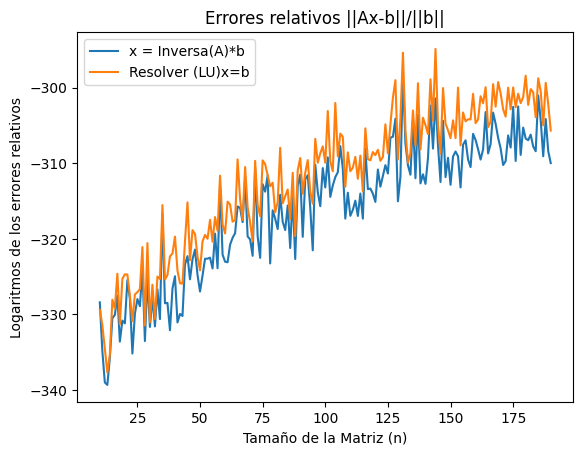

In [55]:
# Crear el gráfico

n = np.arange(10, len (v1))
plt.plot(n,v1[10:], label='x = Inversa(A)*b')
plt.plot(n,v2[10:], label='Resolver (LU)x=b')
plt.title('Errores relativos ||Ax-b||/||b||')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Logaritmos de los errores relativos')
plt.legend()
plt.show()

### ¿Observan el mismo comportamiento?
Si bien observamos la misma tendencia que en el ítem 7, el rango de errores relativos usando librerías de numpy en vez de los algoritmos de implementación propia es mucho más bajo (-340 a -300) vs (-310 a -260), si bien la diferencia a priori no parece tanta hay que recordar que la escala es logarítmica, con lo cual son varios órdenes de magnitud menores, también la mayor diferencia está en el tiempo que tardo en correr el test (6 segundos vs 1 minuto), siendo la API de numpy 10 veces más rápida.

En cuanto a comportamiento de los errores, notamos una diferencia más marcada entre los errores relativos al calcular la inversa de A y los errores relativos al calcular la descomposición LU de A. Esto nos lleva a la misma conclusión que en los ítems 8 y 9: la descomposición LU demuestra ser más confiable en términos de precisión y estabilidad numérica en comparación con la inversión directa de la matriz A al calcular la solución de los sistemas Ax=b.

In [56]:
#EJERCICIO 10

def hilbert_matrix(n):
    """Generates a Hilbert matrix.
    :param n: int, matrix dimension.
    :return H: numpy.matrix, Hilbert matrix"""
    
    # Inicializa una matriz de ceros de tamaño n x n
    H = np.zeros((n, n))
    
    # Rellena la matriz de Hilbert con los valores adecuados
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            H[i - 1, j - 1] = 1 / (i + j - 1)
    
    return H

v1 = np.array([])

# foreach dimension we get the hilbert matrix and calculate the log of their condition number
for n in range(2, 21):
    A = hilbert_matrix(n)
    v1 = np.append(v1, np.log(np.linalg.cond(A, p=2)))


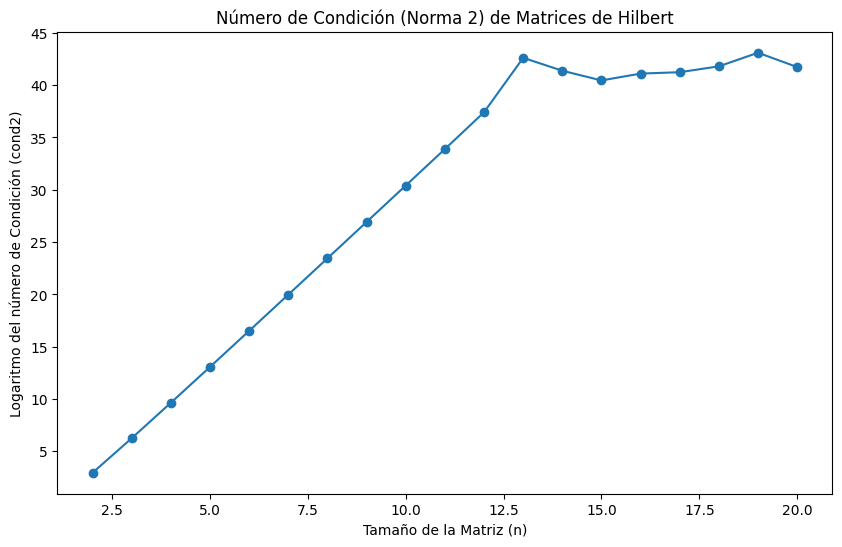

In [57]:
# Crear el gráfico

plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), v1, marker='o', linestyle='-')
plt.title('Número de Condición (Norma 2) de Matrices de Hilbert')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Logaritmo del número de Condición (cond2)')
plt.show()

### Conclusión
El gráfico muestra claramente que, a medida que aumenta la dimensión (n) de las matrices, su número de condición, en particular en relación con la norma-2, aumenta exponencialmente. Este incremento pronunciado en el número de condición indica que estas matrices se tornan progresivamente peor condicionadas a medida que su tamaño crece. 

Como consecuencia directa de esto, al resolver sistemas de ecuaciones lineales que involucran estas matrices, se experimenta una mayor pérdida de precisión y una mayor susceptibilidad a errores numéricos. También, podemos destacar que el número de condición parece estabilizarse para matrices con (n > 12), pero lo más probable es que lleguemos a un límite computacional para seguir computando números más grandes.

## CONCLUSIONES FINALES

En este estudio, exploramos la descomposición LU y sus aplicaciones en la resolución de ecuaciones lineales, Observamos errores relativos a medida que aumentaba la dimensionalidad del problema y comparamos el rendimiento de numpy con algoritmos propios. Tambien vimos el condicionamiento de matrices y todas estas perspectivas arrojan luz sobre la importancia de la estabilidad numérica y la eficiencia en cálculos numéricos.

### Descomposición LU e Inversión

La descomposición LU es una herramienta vital para la resolución eficiente de ecuaciones lineales y la inversión de matrices. Al factorizar una matriz en su descomposicion LU podemos mejorar la eficiencia computacional.


### Errores Relativos y Dimensionalidad

A medida que aumentaba la dimensionalidad del problema, vimos como los metodos para resolver sistemas de ecuaciones lineales mostraban mayores errores relativos. Tanto en las soluciones como en calculos relacionados a ellas.

### Numpy frente a Algoritmos propios

Numpy supera a los algoritmos propios en cuanto a velocidad y precisión. Su implementación altamente optimizada para realizar operaciones con matrices lo hace mejor para cálculos numéricos.

### Condiciónamiento de matrices

Este estudio subraya la importancia de la estabilidad numérica y la eficiencia en cálculos numéricos. En algunas matrices como las de Hilbert tienen números de condición altos, lo que las hace sensibles a pequeñas perturbaciones. Esto destaca la importancia de percatarnos de estas cuestiones y elegir estrategias cuidadosas para abordar problemas con estas matrices en aplicaciones prácticas, ya que los errores numéricos pueden ser significativos.

### Conclusiones Finales

En conclusión, nuestra exploración de la descomposición LU y bibliotecas numéricas como numpy proporciona perspectivas valiosas sobre los fundamentos de la ciencia y la ingeniería computacional. Elegir las herramientas y algoritmos adecuados es esencial para lograr resultados significativos en la resolución de problemas complejos, donde la precisión numérica y la velocidad computacional son fundamentales.